# Netflix TV Shows and Movies EDA

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to avoid warning msg
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading csv file
netflix=pd.read_csv("netflix_titles.csv")

In [4]:
#checking the dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Columns Info

	show_id -Unique ID for every Movie / Tv Show

	type - A Movie or TV Show

	title -Title of the Movie / Tv Show

	director -Director of the Movie

	cast -Actors involved in the movie / show

	country -Country where the movie / show was produced

	date added -Date it was added on Netflix

	release year -Actual Release year of the move / show

	rating -TV Rating of the movie / show

	duration -Total Duration - in minutes or number of seasons

	listed_in -Genere

	description -The summary description

In [5]:
#Dimension of dataset
netflix.shape

(8807, 12)

In [6]:
#information of dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Checking duplicate in dataset
netflix.duplicated().sum()

0

In [8]:
#Finding missing values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

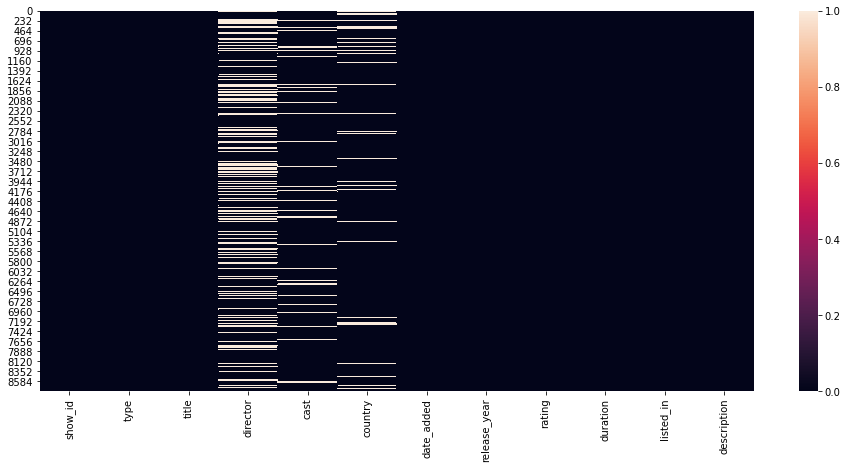

In [9]:
#heatmap for missing values
plt.figure(figsize=(16,7))
sns.heatmap(netflix.isnull())

## Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?


In [10]:
#To show all the records of "House of Cards"

#netflix[netflix["title"].isin(["House of Cards"])] Ornetflix[netflix["title"]=="House of Cards"] 

netflix[netflix["title"].str.contains("House of Cards")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## Q. 2) In which year the highest number of the TV Shows & Movies were released on netflix ? Show with Bar Graph.

In [11]:
#checking the date format 
netflix["date_added"].head(2)

0    September 25, 2021
1    September 24, 2021
Name: date_added, dtype: object

In [12]:
#Converting months into numeric numbers
netflix["Date"]=pd.to_datetime(netflix["date_added"])

In [13]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24


In [14]:
#to count all years only
netflix["Date"].dt.year.value_counts() 

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Date, dtype: int64

<AxesSubplot:>

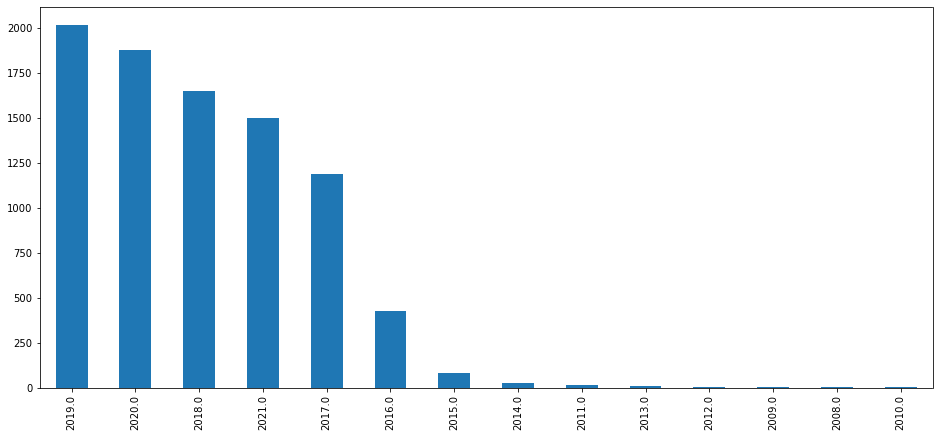

In [15]:
plt.figure(figsize=(16,7))
netflix["Date"].dt.year.value_counts().plot(kind="bar")


<AxesSubplot:xlabel='count', ylabel='release_year'>

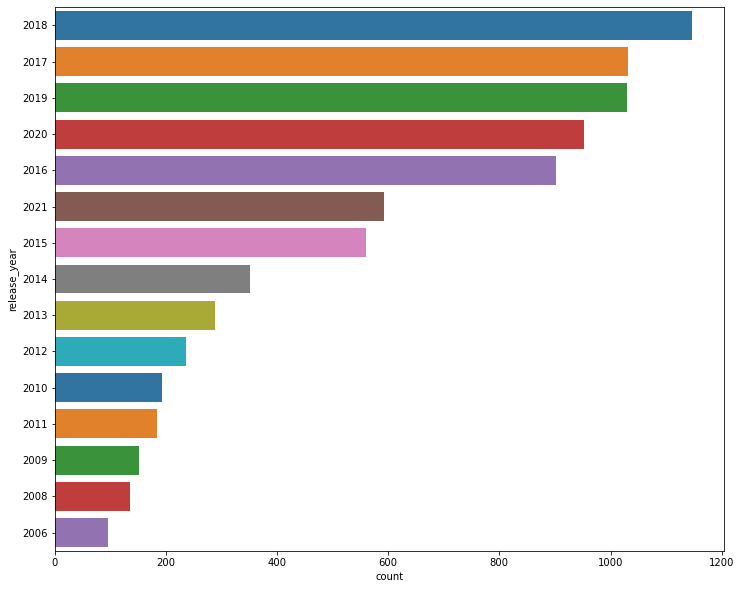

In [16]:
#Actual years when most movies and TV shows are released

plt.figure(figsize=(12,10))
sns.countplot(y="release_year", data=netflix, palette="tab10", order=netflix['release_year'].value_counts().index[0:15])

## Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [17]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Date'],
      dtype='object')

In [18]:
netflix.groupby("type").type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

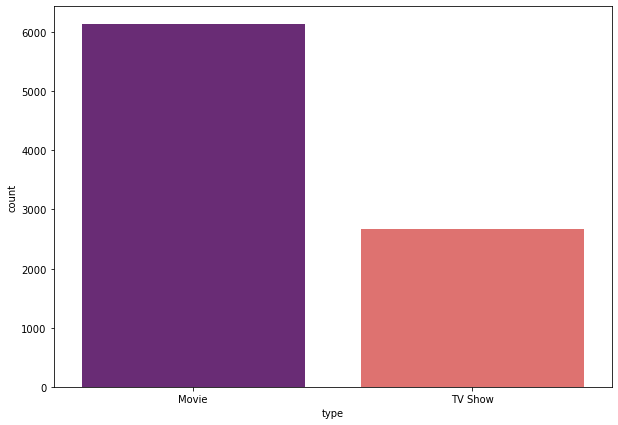

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(netflix["type"], palette="magma")
plt.show()

netflix["type"].value_counts()

## Q. 4) Show all the Movies that were released in year 2000.


In [20]:
netflix[(netflix["release_year"]==2000) & (netflix["type"]=="Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ...",2021-09-01
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,2021-08-01
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,"August 1, 2021",2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer...",2021-08-01
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,2021-07-01
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,"July 1, 2021",2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the...",2021-07-01
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P...",2021-06-02
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...,2021-05-01
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States","October 1, 2019",2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...,2019-10-01
4545,s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,"October 2, 2018",2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...,2018-10-02
4723,s4724,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,TV-14,163 min,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...,2018-08-02


## Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [21]:
netflix[ (netflix["type"]=="TV Show")&(netflix["country"]=="India")]["title"]

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

## Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [22]:
netflix["director"].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: director, dtype: int64

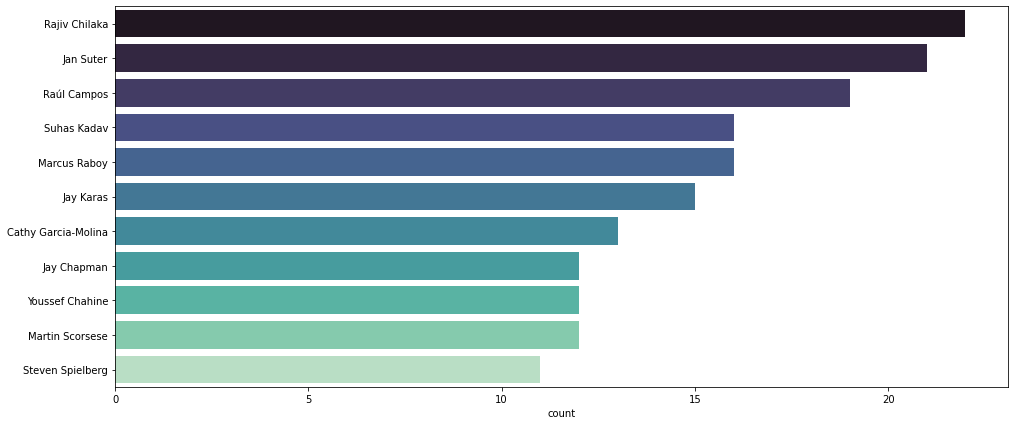

In [23]:
plt.figure(figsize=(16,7))
filtered_directors = netflix[netflix.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:11], palette='mako')
plt.show()

## Q. 7) Show all the Records, where "type is Movie and listed_in is Comedies" or "Country is United Kingdom".

In [24]:
netflix[ (netflix["type"]=="Movie") & (netflix["listed_in"]=="Comedies")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...,2021-09-01
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...,2021-09-01
342,s343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,"August 1, 2021",1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...,2021-08-01
348,s349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States","August 1, 2021",2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ...",2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,s8421,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...","United States, United Kingdom","June 4, 2019",2009,R,94 min,Comedies,A journalist latches onto an unbelievable stor...,2019-06-04
8433,s8434,Movie,The Naked Gun 2 1/2: The Smell of Fear,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",NaN,"January 1, 2020",1991,PG-13,85 min,Comedies,Bumbling cop Frank Drebin is out to foil the b...,2020-01-01
8536,s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,"December 12, 2017",2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...,2017-12-12
8608,s8609,Movie,Total Frat Movie,Warren P. Sonoda,"Justin Deeley, Alex House, Steven Yaffee, Rebe...",United States,"December 19, 2016",2016,NR,94 min,Comedies,A disbanded fraternity tries to get their act ...,2016-12-19


In [25]:
netflix[ (netflix["type"]=="Movie") & (netflix["listed_in"]=="Comedies")| (netflix["country"]=="United Kingdom")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021-09-20
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...,2021-09-17
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...,2021-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...,2017-03-31
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...,2017-03-31
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...,2017-11-04
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01


## Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [26]:
#dropping null values from dataset so our code work

#netflix[netflix["cast"].str.contains("Tom Cruise")] not going to work because of null value

netflix_new=netflix.dropna()

In [27]:
netflix_new[netflix_new["cast"].str.contains("Tom Cruise")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",2021-08-01
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",2021-03-01


## Q. 9) What are the different Ratings defined by Netflix ?


In [28]:
netflix["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

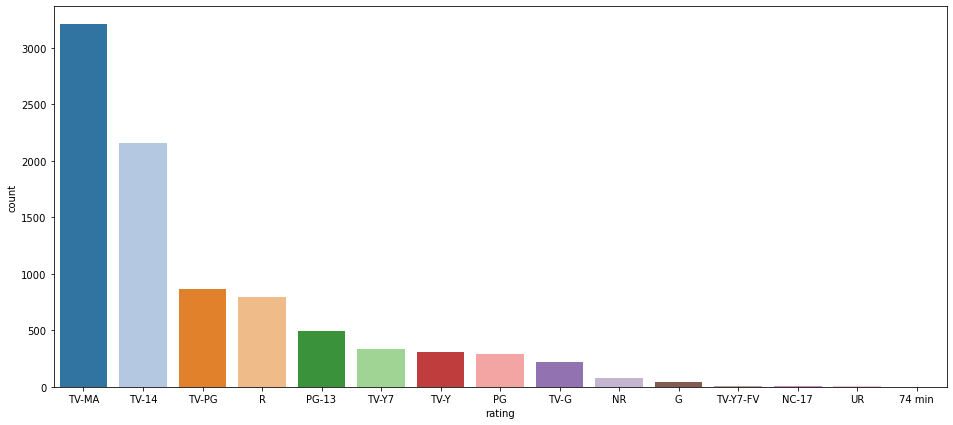

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

In [29]:
plt.figure(figsize=(16,7))
sns.countplot(x="rating", data=netflix, palette="tab20", order=netflix['rating'].value_counts().index[0:15])
plt.show()

netflix["rating"].value_counts()

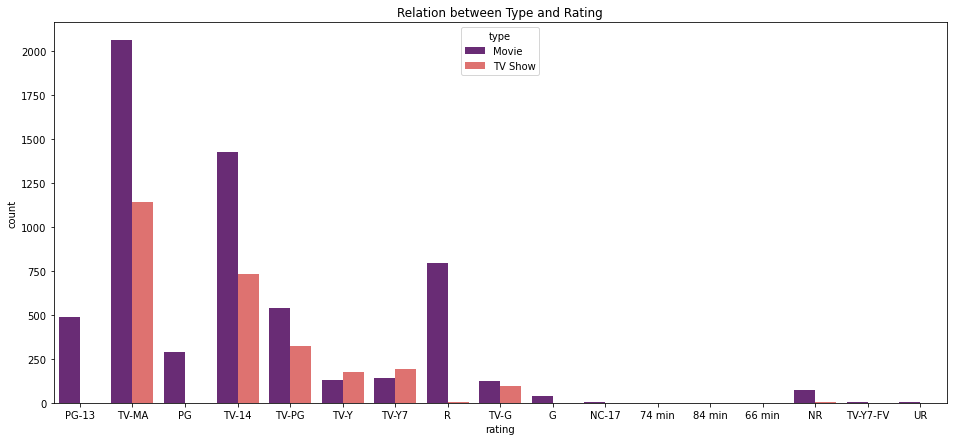

In [30]:
#plotting rating based on type

plt.figure(figsize=(16,7))
sns.countplot(x='rating',hue='type',data=netflix, palette="magma")
plt.title('Relation between Type and Rating')
plt.show()

In [31]:
#Top 10 countries given ratings

countryRatingcount=netflix['country'].value_counts().sort_values(ascending=False)
countryRatingcount=pd.DataFrame(countryRatingcount).reset_index().rename(columns={"index":"country","country":"Rating Count"})
countryRatingcount

top10ratingCountry=countryRatingcount.head(10)
top10ratingCountry

,country,Rating Count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


<AxesSubplot:xlabel='country', ylabel='Rating Count'>

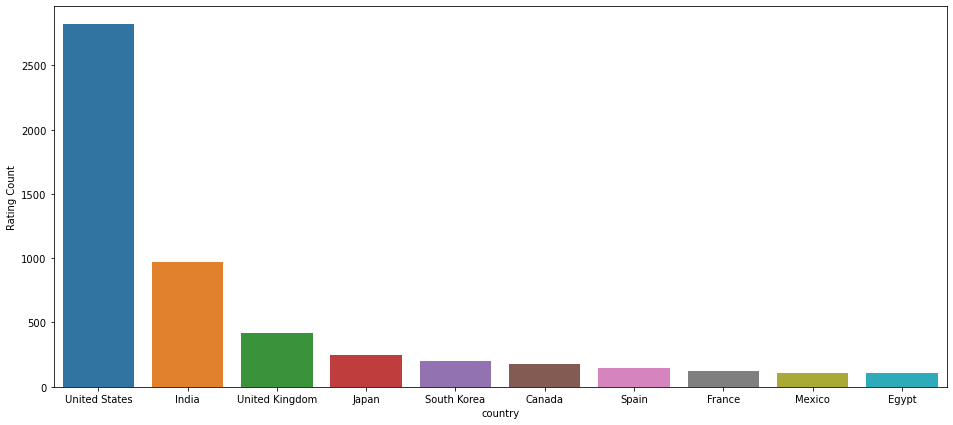

In [32]:
plt.figure(figsize=(16,7))
sns.barplot(x="country",y="Rating Count", data=top10ratingCountry)

## Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [33]:
netflix[(netflix["type"]=="Movie")& (netflix["rating"]=="TV-14") & (netflix["country"]=="Canada")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...,2021-09-01
1279,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,NaN,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...,2021-02-23
2769,s2770,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...,2020-03-27
3424,s3425,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05
5973,s5974,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10
6192,s6193,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",2018,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27
6537,s6538,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",2018,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01
7334,s7335,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",2017,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12
7916,s7917,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",2016,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22


In [34]:
netflix[(netflix["type"]=="Movie")& (netflix["rating"]=="TV-14") & (netflix["country"]=="Canada")].shape

(13, 13)

## Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?


In [35]:
#Creating a new column for netflix release year

netflix["NR_year"]= netflix["Date"].dt.year

In [36]:
netflix[(netflix["type"]=="TV Show") & (netflix["rating"]=="R") & (netflix["NR_year"]>2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year
3893,s3894,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",2015,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


## Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [37]:
netflix["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [38]:
netflix["duration"].dtypes

dtype('O')

In [39]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0


In [40]:
#Splitting duration columns in numeric and unit

netflix[["MinutesOrSeasons", "Unit"]] =netflix["duration"].str.split(" ", expand=True)

In [41]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2,Seasons


In [42]:
#Converting MinutesOrSeasons column into numeric

netflix["MinutesOrSeasons"]=pd.to_numeric(netflix["MinutesOrSeasons"])

In [43]:
netflix["MinutesOrSeasons"].max()

312.0

In [44]:
netflix[netflix["MinutesOrSeasons"]==312]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,2018.0,312.0,min


## Q. 11) Which individual country has the Highest No. of TV Shows ?

In [45]:
#Creating new dataframe for netflix TV Show
Netflix_TvShows= netflix[netflix["type"]=="TV Show"]

In [46]:
Netflix_TvShows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,1.0,Season


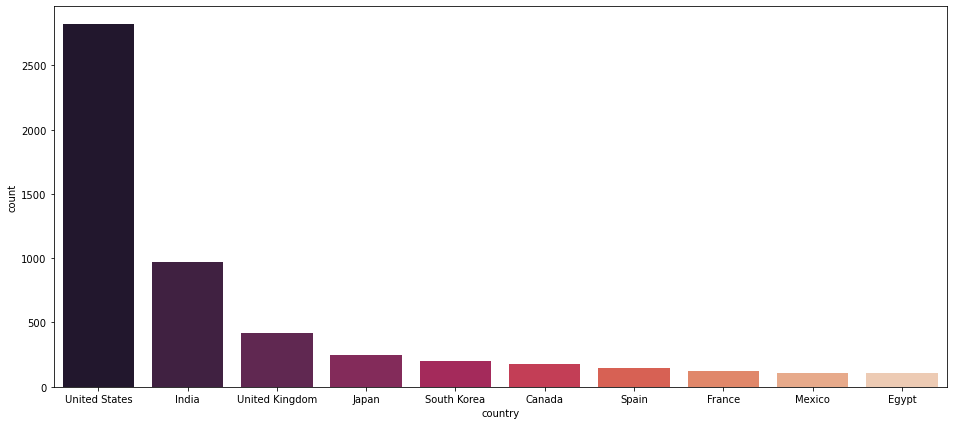

United States                       760
United Kingdom                      213
Japan                               169
South Korea                         158
India                                79
                                   ... 
Luxembourg                            1
Argentina, United States, Mexico      1
Canada, United Kingdom                1
Italy, Canada, France                 1
Australia, New Zealand                1
Name: country, Length: 196, dtype: int64

In [47]:
plt.figure(figsize=(16,7))

sns.countplot(x = netflix["country"], order=netflix["country"].value_counts().index[:10], palette='rocket')
plt.show()
Netflix_TvShows["country"].value_counts()

# Q. 12) How can we sort the dataset by Year ?

In [48]:
#Sorting dataset according netflix releasing year (most recent release first)
netflix.sort_values(by="NR_year",ascending=False).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,90.0,min
996,s997,Movie,HOMUNCULUS,Takashi Shimizu,"Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishi...",Japan,"April 22, 2021",2021,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Truth and illusion blurs when a homeless amnes...,2021-04-22,2021.0,116.0,min
1005,s1006,Movie,Keymon and Nani in Space Adventure,NaN,NaN,NaN,"April 20, 2021",2013,TV-Y,76 min,"Children & Family Movies, Comedies","For Rohan and his magical pal, Keymon, a trip ...",2021-04-20,2021.0,76.0,min
1004,s1005,TV Show,Izzy's Koala World,NaN,"Izzy Bee, Ali Bee, Tim Bee",Australia,"April 20, 2021",2021,TV-Y,2 Seasons,Kids' TV,Young koala caretaker Izzy Bee and her family ...,2021-04-20,2021.0,2.0,Seasons
1003,s1004,TV Show,Zero,NaN,"Giuseppe Dave Seke, Haroun Fall, Beatrice Gran...",Italy,"April 21, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",A shy teen with the power to turn invisible mu...,2021-04-21,2021.0,1.0,Season


### Q. 13) Find all the instances where: type is 'Movie' and listed_in is 'Dramas' or type is 'TV Show' & listed_in is 'Kids' TV'.

In [49]:
netflix[(netflix["type"]=="Movie") & (netflix["listed_in"]=="Dramas") |
        (netflix["type"]=="TV Show") & (netflix["listed_in"]=="Kids' TV")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,2021-09-17,2021.0,1.0,Season
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16,2021.0,3.0,Seasons
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021-09-15,2021.0,6.0,Seasons
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",2021-09-09,2021.0,4.0,Seasons
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,2021-09-07,2021.0,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019-03-02,2019.0,109.0,min
8696,s8697,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India","May 6, 2019",2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",2019-05-06,2019.0,147.0,min
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,2018.0,1.0,Season
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,2018.0,1.0,Season


## Q.14) Top 20 Popular Genres

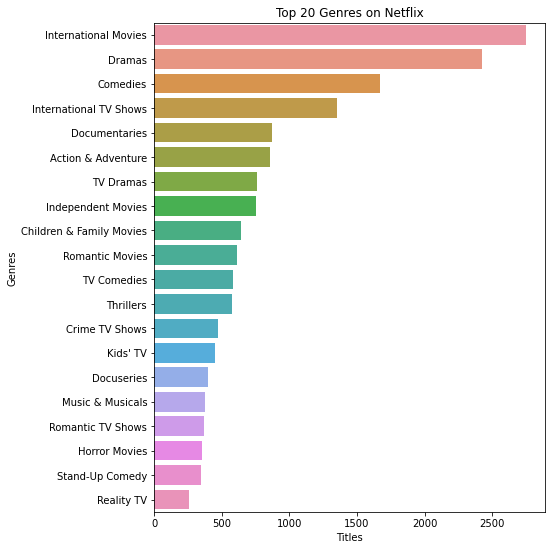

In [50]:
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## Q.15) Who are the top 10 actors on Netflix based on number of titles?

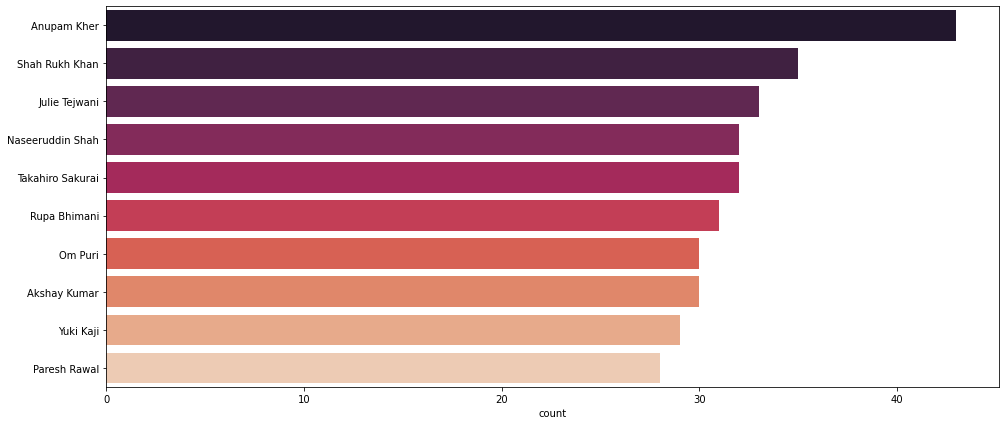

In [51]:
plt.figure(figsize=(16,7))
filtered_cast = netflix[netflix.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()


In [52]:
netflix['month_added'] = pd.DatetimeIndex(netflix['date_added']).month

In [53]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,90.0,min,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2.0,Seasons,9.0


## Q.16) Plot a countplot for Number of seasons.

In [54]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,90.0,min,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2.0,Seasons,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,1.0,Season,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,1.0,Season,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,2.0,Seasons,9.0


In [55]:
#Creating new dataframe for TV Show
netflix_shows = netflix[netflix['type']=='TV Show']
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2.0,Seasons,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,1.0,Season,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,1.0,Season,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,2.0,Seasons,9.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,2021.0,1.0,Season,9.0


In [56]:
#for replacing 1 Season with 1 Seasons
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)

In [57]:
netflix_shows.rename(columns={'duration':'seasons'}, inplace=True)

In [58]:
netflix_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description,Date,NR_year,MinutesOrSeasons,Unit,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,2.0,Seasons,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,1.0,Season,9.0


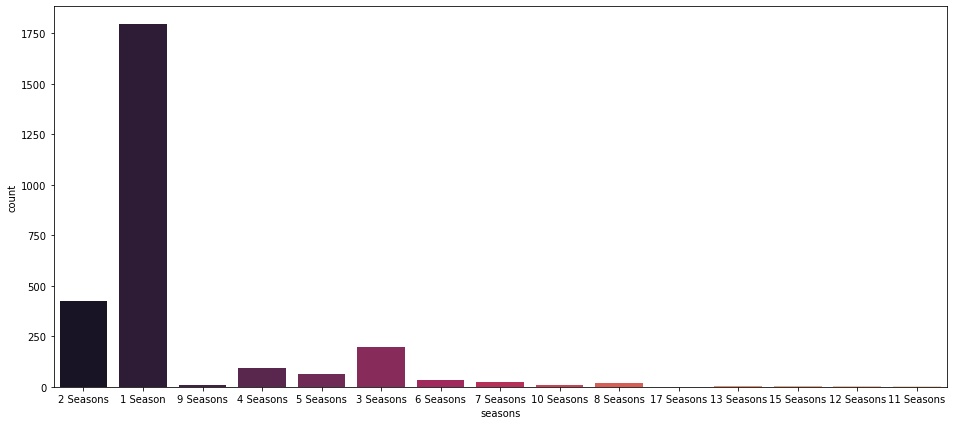

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
12 Seasons       2
11 Seasons       2
15 Seasons       2
17 Seasons       1
Name: seasons, dtype: int64

In [59]:
plt.figure(figsize=(16,7))
sns.countplot(netflix_shows.seasons,palette="rocket")
plt.show()

netflix_shows.seasons.value_counts()

##  Heatmap for content based on Netflix released year and month

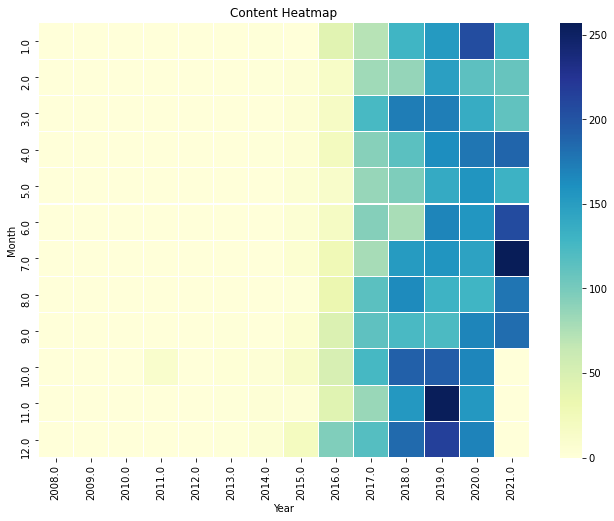

In [60]:
month_year_df = netflix.groupby('NR_year')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

From the heatmap it is clearly evident that the Netflix continuously increasing their content after 2016.They started uploading the content from 2016 in India and increasing every year. Netflix has exponential growth in India.

# Inferences

**Netflix OTT platform shows tremendous growth in India. Netflix creating number of TV shows and Movies targeting every country. From the dataset it is evident they have their presence in number of countries and creating the regional content for their growth. The also uploading the old movies and TV series by buying their rights. They dubbing the movies in regional languages and also creating the regional content which is why Netflix able to hold the market. Netflix also investing in various countries for content creation. Netflix is one of the most famous OTT platforms.Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.**   